# Data Visualization
In this notebook, we will pracically learn how to visualize data using Python. We will use the `matplotlib` library to create plots and the `seaborn` library to create more complex and beautiful plots. We will also learn how to create interactive plots using the `plotly` library.

## Data
The dataset we will be using in this tutorial is same as the one used in the previous exercise about pandas. This dataset contains the top 250 movies from IMDB as of 2022. You can access the preprocessed `JSON` file from [here](https://parsa-abbasi.github.io/slides/pandas/imdb_top_250_movies.json).

In [1]:
import numpy as np
import pandas as pd
imdb = pd.read_json('https://parsa-abbasi.github.io/slides/pandas/imdb_top_250_movies.json')
imdb.head(3)

,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,The Shawshank Redemption,1994,9.3,[Drama],R,142.0,Fear can hold you prisoner. Hope can set you f...,25000000,2.888450e+07,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Stephen King, Frank Darabont]"
1,The Godfather,1972,9.2,"[Crime, Drama]",R,175.0,An offer you can't refuse.,6000000,2.503418e+08,"[Marlon Brando, Al Pacino, James Caan, Diane K...",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]"
2,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",PG-13,152.0,Why So Serious?,185000000,1.006234e+09,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G..."


## Matplotlib

<center>
<img src="https://parsa-abbasi.github.io/talk/data-preparation-and-visualization-in-python/matplotlib.png" width="200" height="200" />
</center>

Matplotlib is a data visualization library for Python that provides a wide variety of tools for creating plots, charts, and graphs. It is one of the most widely used data visualization libraries in the scientific and data analysis communities and is known for its flexibility and customizability.

Matplotlib provides a range of plotting functions for creating different types of plots such as line plots, scatter plots, bar charts, histograms, and more. These plots can be customized with a wide range of options such as titles, axis labels, legends, colors, and more.

There are two main ways to use Matplotlib:
1. **The MATLAB-style interface:** This is a high-level interface that is similar to the plotting functions in MATLAB. It is a simple and convenient way to create basic plots.
2. **The object-oriented interface:** This is a more flexible and customizable interface that is useful for more complex plots. This interface gives more control over the details of the plot.

In [2]:
from matplotlib import pyplot as plt
# We use the following command to show the plots properly in the notebook
%matplotlib inline

### Histogram: The MATLAB-style interface
The **histogram** is a plot that shows the frequency of values in a dataset. It shows the number of data points that fall within a range of values. We can use the `hist()` function to create a histogram. The following table shows the most important parameters of the `hist()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `x` | The data to be plotted. | A list or array of values. |
| `bins` | The number of bins to use. | An integer. |
| `orientation` | The orientation of the bars. | `horizontal` or `vertical`. |
| `range` | The range of values to include in the histogram. | A tuple of two values. |
| `cumulative` | If `True`, the histogram will be cumulative. | `True` or `False`. |
| `histtype` | The type of histogram to plot. | `bar`, `barstacked`, `step`, `stepfilled`. |
| `stacked` | If `True`, the bars will be stacked. | `True` or `False`. |
| `align` | The alignment of the bars. | `left`, `mid`, or `right`. |

</center>

In [3]:
print('Max rating: ', imdb['rating'].max())
print('Min rating: ', imdb['rating'].min())

Max rating:  9.3
Min rating:  8.0


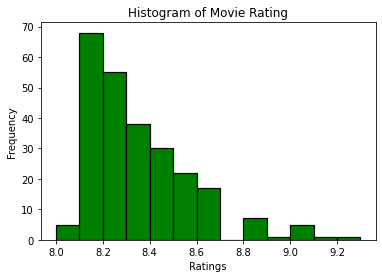

In [4]:
plt.hist(imdb['rating'], bins=13, orientation='vertical', color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Rating')
plt.show()

### Histogram: The object-oriented interface
In this interface, we first create a figure and an axis object using the `subplots()` function. Then, we can plot and customize our chart on the axis we want.

Text(0.5, 1.0, 'Cumulative Histogram of Movie Rating')

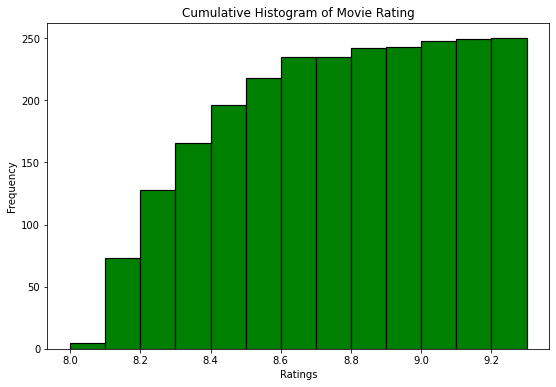

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(imdb['rating'], bins=13, orientation='vertical', color='green', edgecolor='black', linewidth=1.2, cumulative=True)
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
ax.set_title('Cumulative Histogram of Movie Rating')

### Multiple plots
We can create multiple plots in the same figure using the `subplot()` function. We can specify the number of rows and columns of the subplot grid using the `nrows` and `ncols` parameters.

Text(0.5, 1.0, 'Histogram of Movie Year')

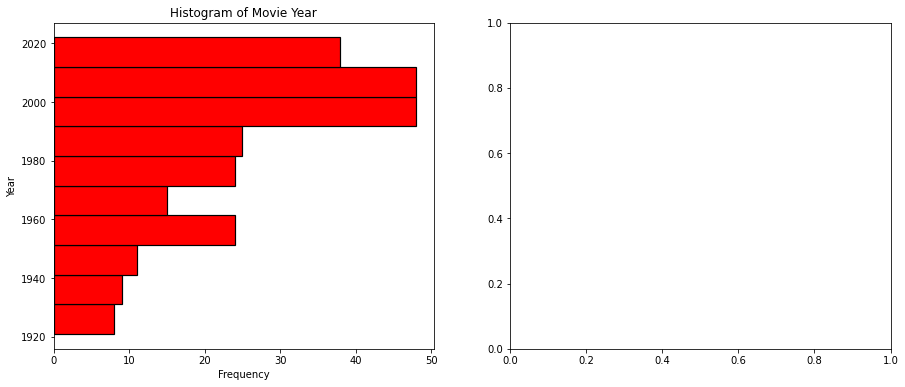

In [6]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2, facecolor='white')

ax[0].hist(imdb['year'], bins=10, orientation='horizontal', color='red', edgecolor='black', linewidth=1.2)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Year')
ax[0].set_title('Histogram of Movie Year')

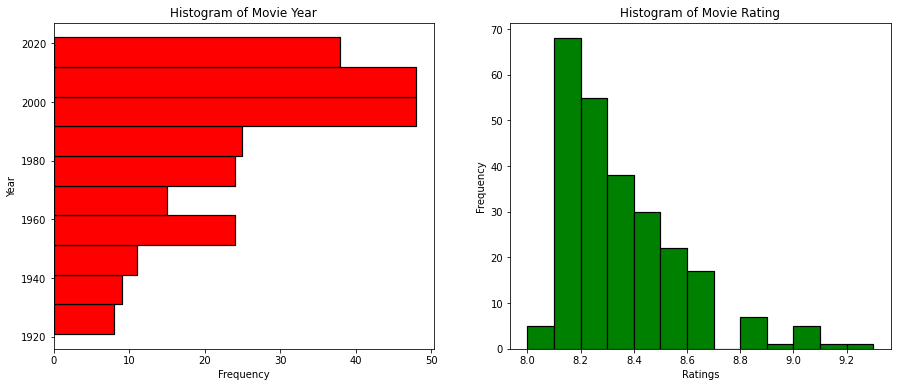

In [7]:
ax[1].hist(imdb['rating'], bins=13, orientation='vertical', color='green', edgecolor='black', linewidth=1.2)
ax[1].set_xlabel('Ratings')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Movie Rating')

fig

### Bar Chart
A **bar chart** is a plot that shows the relationship between two variables. The x-axis represents the categories and the y-axis represents the values. We can use the `bar()` function to create a bar chart. The following table shows the most important parameters of the `bar()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `x` | The x-axis values. | A list or array of values. |
| `height` | The height of the bars. | A list or array of values. |
| `width` | The width of the bars. | A number. |
| `bottom` | The y-axis values of the bottom of the bars. | A list or array of values. |
| `align` | The alignment of the bars. | `left`, `mid`, or `right`. |

</center>

In [8]:
year_counts = imdb['year'].value_counts()
year_counts = year_counts.sort_index()
year_counts

1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2018    4
2019    6
2020    2
2021    2
2022    1
Name: year, Length: 86, dtype: int64

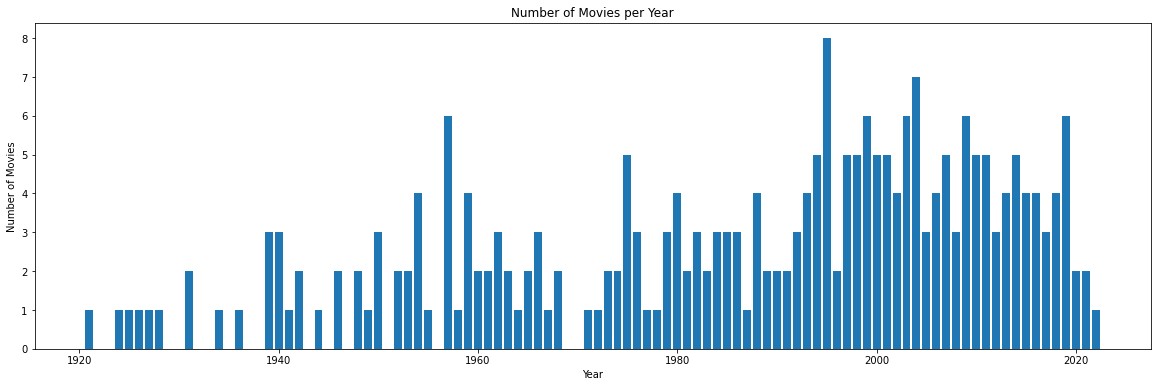

In [9]:
fig, ax = plt.subplots(figsize=(20, 6), facecolor='white')
ax.bar(year_counts.index, year_counts.values, width=0.8, align='center')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies per Year');

#### X-axis and Y-axis ticks
We can use the `xticks()` and `yticks()` functions to customize the ticks on the x-axis and y-axis.

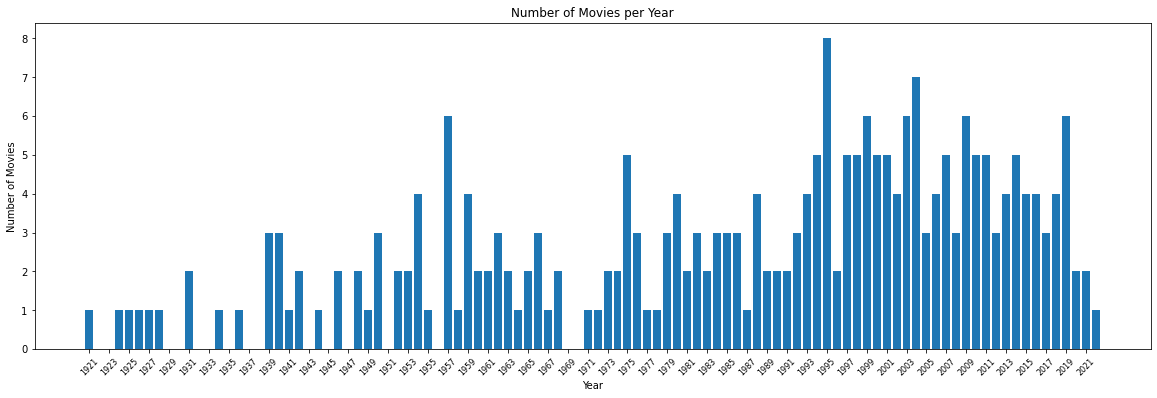

In [10]:
years = range(imdb['year'].min(), imdb['year'].max()+1, 2)
ax.set_xticks(years, rotation=45, labels=years, fontsize=8)
fig

#### Grid Lines
We can use the `grid()` function to add grid lines to the plot. The following table shows the most important parameters of the `grid()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `axis` | The axis on which to draw the grid lines. | `x`, `y`, or `both`. |
| `color` | The color of the grid lines. | A string representing a color. |
| `linestyle` | The style of the grid lines. | A string representing a line style. |
| `linewidth` | The width of the grid lines. | A number. |

</center>

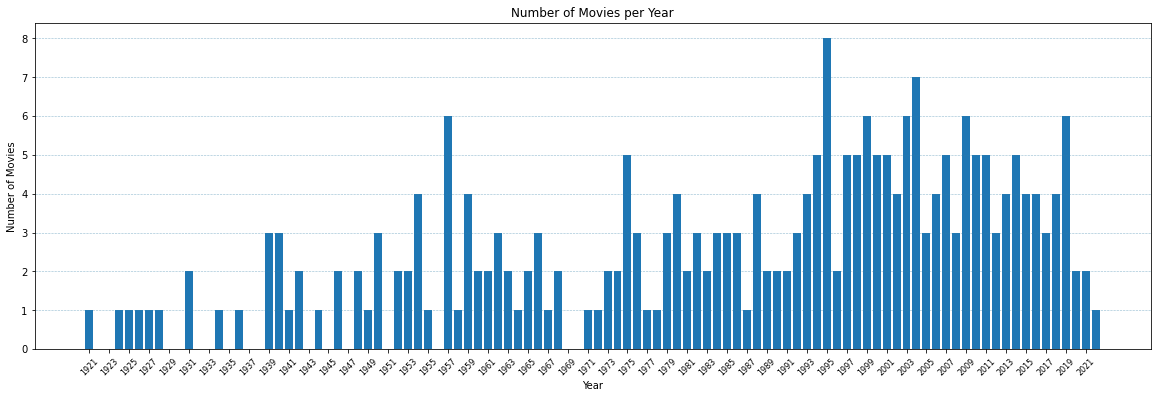

In [11]:
ax.grid(axis='y', color='#327fa8', linestyle='dashed', linewidth=0.6, alpha=0.5)
fig

### Scatter Plot
A **scatter plot** is a plot that shows the relationship between two variables. The x-axis represents the values of one variable and the y-axis represents the values of the other variable. We can use the `scatter()` function to create a scatter plot. The following table shows the most important parameters of the `scatter()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `x` | The x-axis values. | A list or array of values. |
| `y` | The y-axis values. | A list or array of values. |
| `s` | The size of the markers. | A number or a list of numbers. |
| `c` | The color of the markers. | A string representing a color or a list of strings representing colors. |
| `marker` | The marker shape. | A string representing a marker shape. |

</center>

In [12]:
# Fing all unique genres
genres = set()
for genre_list in imdb['genre']:
    for genre in genre_list:
        genres.add(genre)
print(genres)

{'Adventure', 'Comedy', 'Musical', 'Animation', 'History', 'Sci-Fi', 'Horror', 'Romance', 'Sport', 'Music', 'Drama', 'Western', 'War', 'Film-Noir', 'Mystery', 'Biography', 'Action', 'Family', 'Thriller', 'Crime', 'Fantasy'}


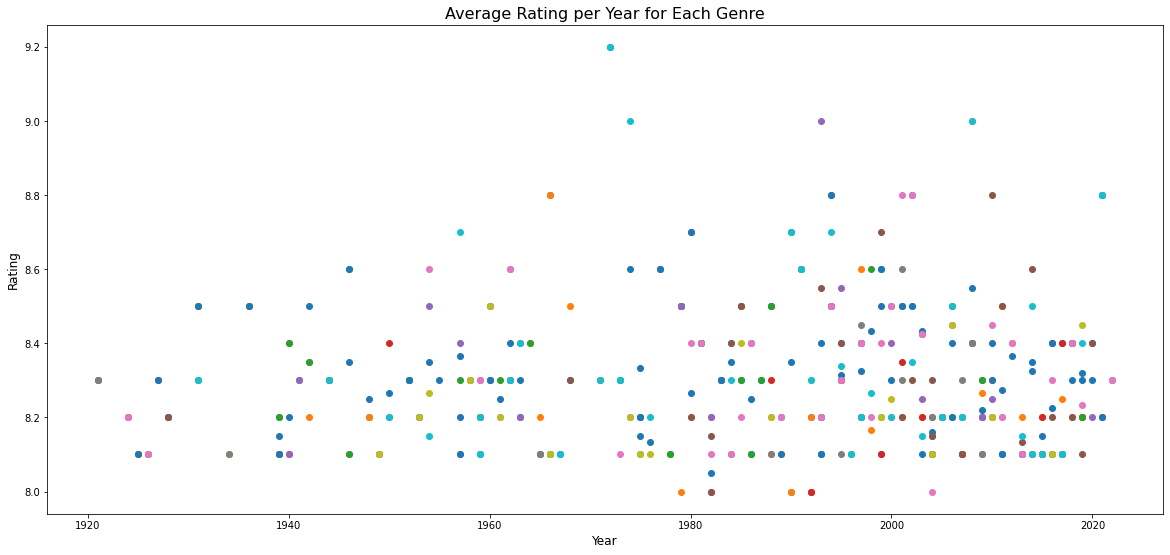

In [13]:
import numpy as np
fig, ax = plt.subplots(figsize=(20, 9), facecolor='white')

# sort the dataframe by year
df_sorted = imdb.sort_values(by='year')

# plot each genre as a separate scatter plot
for genre in genres:
    # filter the dataframe to only include movies of the current genre
    df_genre = df_sorted[df_sorted['genre'].apply(lambda x: genre in x)]
    # get the average rating for each year
    df_genre = df_genre.groupby('year').mean()
    # plot the average rating for each year
    ax.scatter(df_genre.index, df_genre['rating'], label=genre)

ax.set_title("Average Rating per Year for Each Genre", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Rating", fontsize=12);

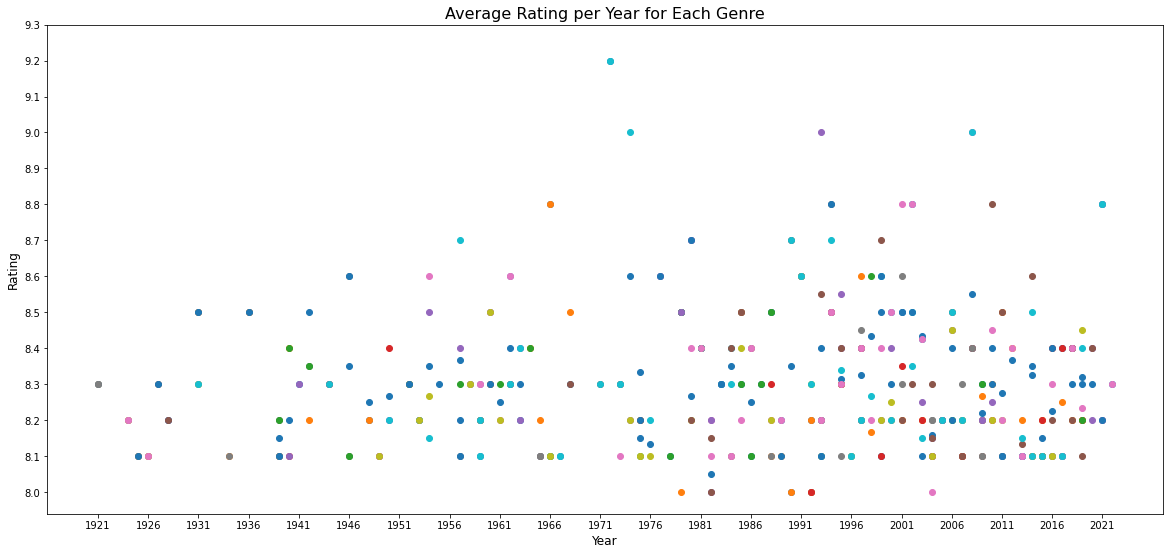

In [14]:
ax.set_xticks(range(imdb['year'].min(), imdb['year'].max(), 5))
ax.set_yticks(np.arange(imdb['rating'].min(), imdb['rating'].max(), 0.1))
fig

#### Legend
Legend is a box that shows the label of each line in the plot. The `legend()` function is used to add a legend to the plot.   
We can use the `loc` parameter to specify the location of the legend. This parameter can take the values such as `best`, `upper right`, `upper left`, etc.   
We can also change the number of columns in the legend using the `ncol` parameter.

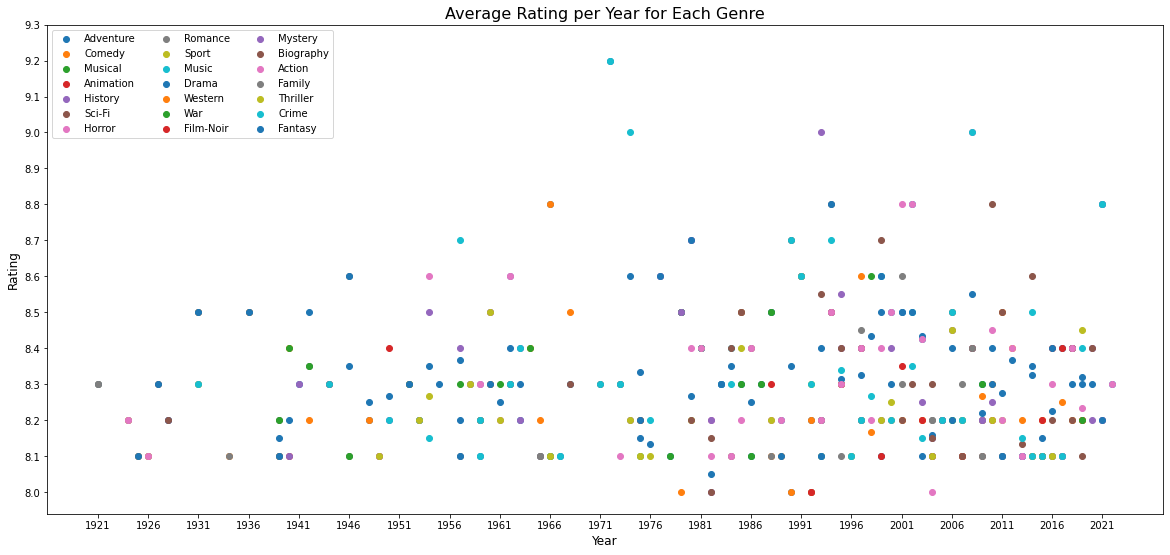

In [15]:
ax.legend(loc='upper left', ncol=3)
fig

#### Text and Annotations
We can add text and annotations to our plots using the `text()` and `annotate()` functions.   
The `text()` function adds text to a specific location on the plot. The `annotate()` function adds an arrow with text to a specific location on the plot.   
In `text()`, the first two parameters are the x and y coordinates of the text. The third parameter is the text itself.   
The `annotate()` function takes the following parameters:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `s` | The text of the annotation. | A string. |
| `xy` | The location of the point to annotate. | A tuple of two values. |
| `xytext` | The location of the text. | A tuple of two values. |
| `arrowprops` | The properties of the arrow. | A dictionary. |

</center>

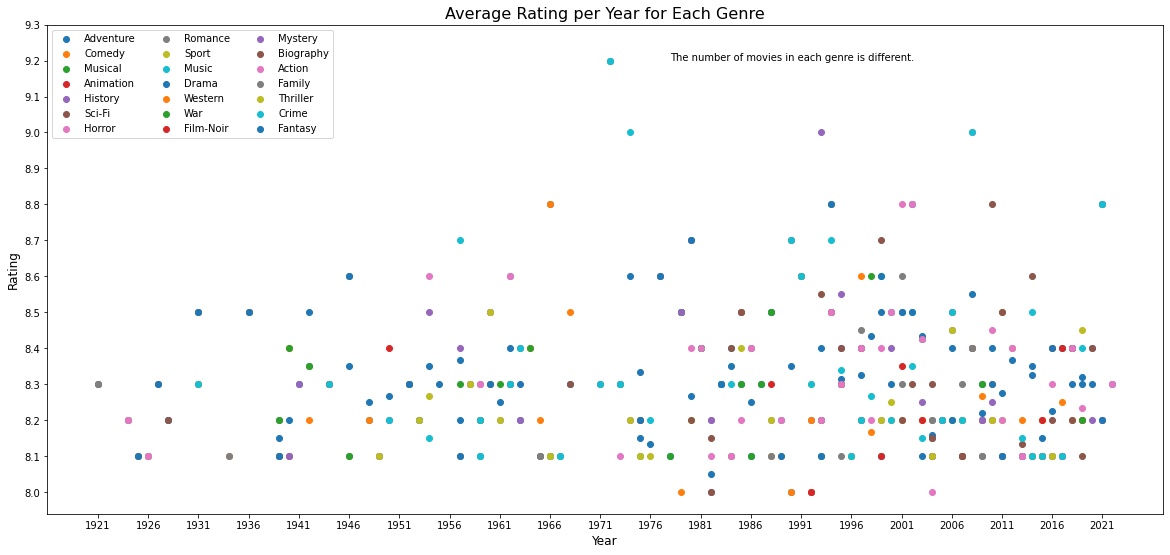

In [16]:
ax.text(1978, 9.2, 'The number of movies in each genre is different.')
fig

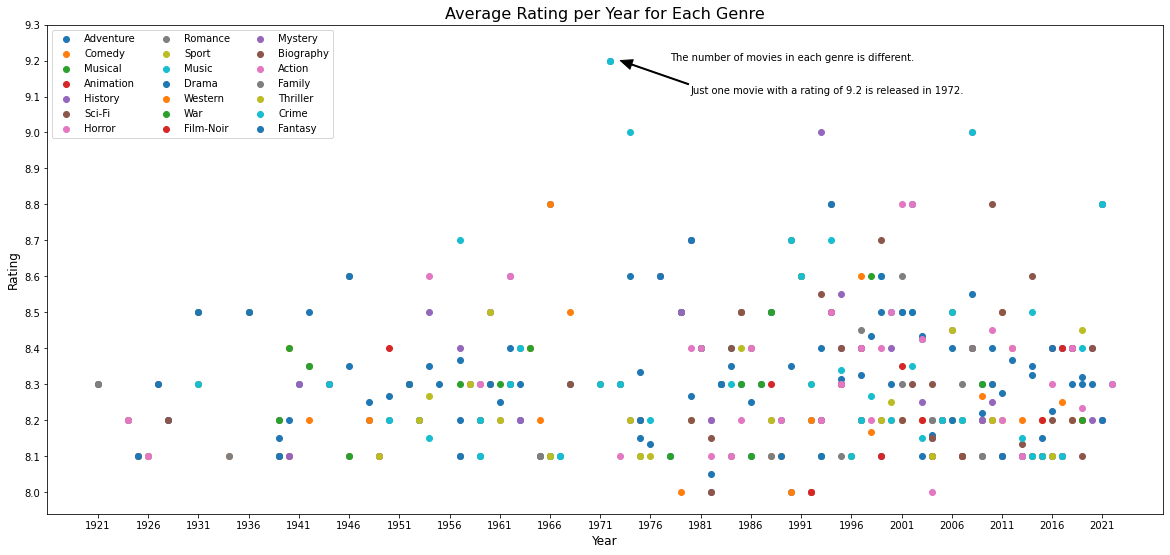

In [17]:
ax.annotate('Just one movie with a rating of 9.2 is released in 1972.',
            xy=(1973, 9.2), xytext=(1980, 9.11), 
            arrowprops=dict(headwidth=10, width=1, facecolor='black'))

fig

### Line Plot
A **line plot** is used to visualize the trend of a variable over time or any continuous numerical variable. The plot can be created using the `plot()` function in Matplotlib. Some of the most useful parameters for line plot are:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `x` | The x-axis values. | A list or array of values. |
| `y` | The y-axis values. | A list or array of values. |
| `label` | The label of the line. | A string. |
| `linestyle` | The style of the line. | `solid`, `dashed`, `dashdot`, `dotted`. |
| `marker` | The marker style. | `o`, `v`, `^`, `<`, `>`, `s`, `p`, `*`, `h`, `H`, `D`, `d`, `P`, `X`, `x`, `|`, `_`, `None`. |
| `markersize` | The size of the marker. | A number. |
| `markeredgecolor` | The color of the marker edge. | A string representing a color. |
| `markerfacecolor` | The color of the marker face. | A string representing a color. |

</center>

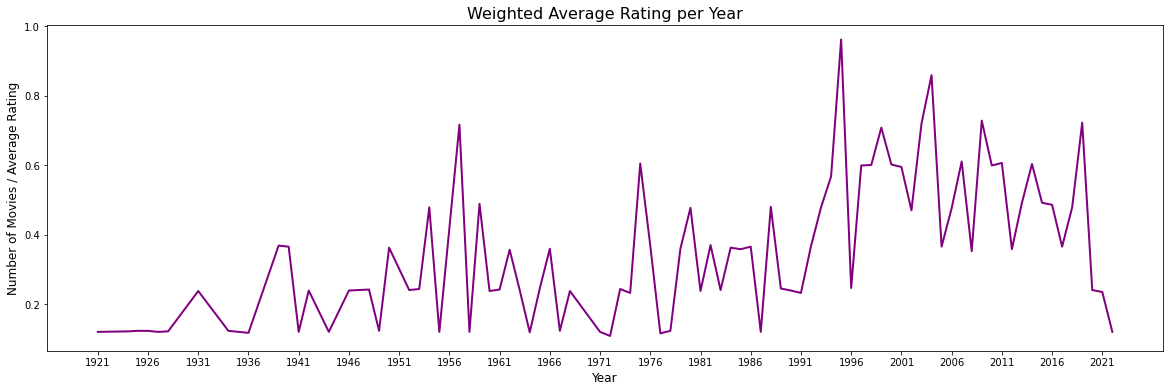

In [18]:
fig, ax = plt.subplots(figsize=(20, 6), facecolor='white')
weighted_avg_rating =  imdb.groupby('year')['rating'].count() / imdb.groupby('year')['rating'].mean()
ax.plot(weighted_avg_rating, color='purple', linewidth=2)
ax.set_title('Weighted Average Rating per Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Movies / Average Rating', fontsize=12)
ax.set_xticks(range(imdb['year'].min(), imdb['year'].max(), 5));

### Pie Chart
A **pie chart** is a circular chart divided into slices to show the numerical proportion of each category. We can use the `pie()` function to create a pie chart. The following table shows the most important parameters of the `pie()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `x` | The values to be plotted. | A list or array of values. |
| `labels` | The labels of the slices. | A list of strings. |
| `colors` | The colors of the slices. | A list of strings representing colors. |
| `autopct` | The format of the percentage. | A string. |
| `counterclock` | If `True`, the pie chart will be drawn in a counter-clockwise direction. | `True` or `False`. |
| `shadow` | If `True`, the pie chart will have a shadow. | `True` or `False`. |
| `startangle` | The starting angle of the first slice. | A number. |
| `labeldistance` | The distance of the labels from the center. | A number. |
| `pctdistance` | The distance of the percentage from the center. | A number. |

</center>

**Note:** If you want to see more advanced examples of pie charts, you can check out [this blog post](https://proclusacademy.com/blog/customize_matplotlib_piechart/).

In [19]:
certificates = imdb['certificate'].value_counts()
certificates

R            97
PG           37
PG-13        35
Not Rated    24
G            19
Passed       16
Approved     14
18+           1
TV-PG         1
Unrated       1
X             1
13+           1
TV-MA         1
GP            1
Name: certificate, dtype: int64

In [20]:
certificates['Other'] = certificates[certificates == 1].sum()
certificates = certificates[certificates > 1]
certificates

R            97
PG           37
PG-13        35
Not Rated    24
G            19
Passed       16
Approved     14
Other         7
Name: certificate, dtype: int64

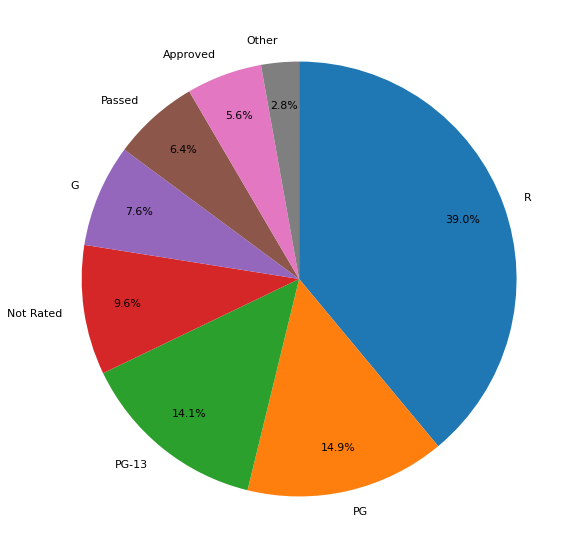

In [21]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.pie(certificates.values, labels=certificates.index,
       autopct='%1.1f%%', startangle=90, counterclock=False,
       pctdistance=0.8, labeldistance=1.1, textprops={'fontsize': 11});

### Pandas + Matplotlib
Pandas provides a number of functions that can be used to create plots directly from a dataframe. These functions are called **plotting functions**. The plotting functions in Pandas are built on top of the matplotlib library and are therefore not very customizable.

<center>

| Function | Description |
| --- | --- |
| `df.plot()` | Creates a plot using the default matplotlib backend. |
| `df.plot.line()` | Creates a line plot. |
| `df.plot.bar()` | Creates a bar plot. |
| `df.plot.barh()` | Creates a horizontal bar plot. |
| `df.plot.hist()` | Creates a histogram. |
| `df.plot.box()` | Creates a box plot. |
| `df.plot.scatter()` | Creates a scatter plot. |
| `df.plot.pie()` | Creates a pie chart. |

</center>

<Axes: ylabel='Frequency'>

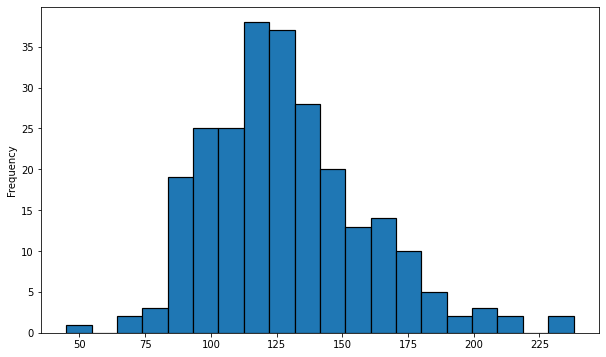

In [22]:
imdb['run_time'].plot.hist(bins=20, edgecolor='black', linewidth=1.2, figsize=(10, 6))

## Seaborn


<center>
<img src="https://parsa-abbasi.github.io/talk/data-preparation-and-visualization-in-python/seaborn.png" width="200" height="200" />
</center>

Seaborn is a powerful Python data visualization library that provides a high-level interface for creating informative and attractive statistical graphics. Seaborn is built on top of the matplotlib library and provides a number of advanced features and functions that make it easier to create complex visualizations. 

One of the advantages of Seaborn is that it is designed to work well with Pandas dataframes. Seaborn also provides a number of color palettes that are specifically designed to work well with different types of data, making it easy to create plots that are both informative and visually appealing.

In [23]:
import seaborn as sns

### Set Style
Seaborn provides a number of built-in themes that can be used to change the appearance of the plots. The following table shows the most important themes:

<center>

| Theme | Description |
| --- | --- |
| `darkgrid` | A dark background with a grid. |
| `whitegrid` | A white background with a grid. |
| `dark` | A dark background without a grid. |
| `white` | A white background without a grid. |
| `ticks` | A white background without a grid and with ticks. |

</center>

In [24]:
sns.set_style("darkgrid")

### Set Context
Seaborn provides a number of built-in contexts that can be used to change the size of the plots. The following table shows the most important contexts:

<center>

| Context | Description |
| --- | --- |
| `paper` | Small size. |
| `notebook` | Medium size. |
| `talk` | Large size. |
| `poster` | Extra large size. |

</center>

In [25]:
sns.set_context("notebook")

### Distribution Plot
The **distribution plot** is like a histogram, but it also shows the probability density function (PDF) of the data. We can use the `distplot()` function to create a distribution plot. The following table shows the most important parameters of the `distplot()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `bins` | The number of bins. | A number. |
| `hist` | If `True`, a histogram will be drawn. | `True` or `False`. |
| `kde` | If `True`, a kernel density estimate will be drawn. | `True` or `False`. |

</center>

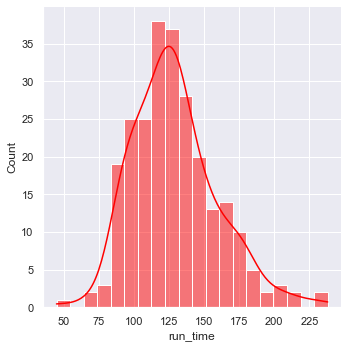

In [26]:
sns.displot(imdb['run_time'], kde=True, color='red', bins=20);

### Heatmap
A **heatmap** is a graphical representation of data where the individual values contained in a matrix are represented as colors. We can use the `heatmap()` function to create a heatmap. The following table shows the most important parameters of the `heatmap()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `data` | The data to be plotted. | A dataframe or a 2D array. |
| `cmap` | The color map to use. | A string representing a color map (e.g. `Blues`, `YlGnBu`, `BuGn`, `coolwarm`). |
| `annot` | If `True`, the values will be annotated. | `True` or `False`. |
| `fmt` | The format of the annotations. | A string. |
| `linewidths` | The width of the lines that will separate each cell. | A number. |
| `linecolor` | The color of the lines that will separate each cell. | A string representing a color. |
| `cbar` | If `True`, a color bar will be added to the plot. | `True` or `False`. |
| `cbar_kws` | The properties of the color bar. | A dictionary. |
| `square` | If `True`, the cells will be square-shaped. | `True` or `False`. |
| `vmin` | The minimum value of the color map. | A number. |
| `vmax` | The maximum value of the color map. | A number. |

</center>

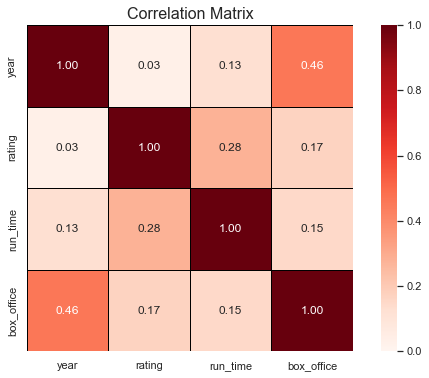

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(imdb.corr(), annot=True, cmap='Reds', linewidths=0.5, linecolor='black', fmt='.2f', square=True, vmin=0, vmax=1)
ax.set_title('Correlation Matrix', fontsize=16);

### Box Plot
The **box plot** is a standardized way of displaying the distribution of data based on a five number summary: minimum, first quartile (`Q1`), median (`Q2`), third quartile (`Q3`), and maximum. We can use the `boxplot()` function to create a box plot. The following table shows the most important parameters of the `boxplot()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `orient` | The orientation of the plot. | `v` or `h`. |
| `fliersize` | The size of the outlier points. | A number. |

</center>


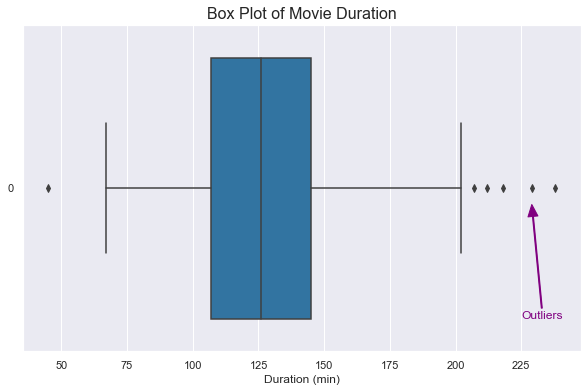

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(imdb['run_time'], orient='h')
ax.set_title('Box Plot of Movie Duration', fontsize=16)
ax.set_xlabel('Duration (min)', fontsize=12)
ax.annotate('Outliers', xy=(229, 0.05), xytext=(225, 0.4), arrowprops=dict(color='purple', width=1, headwidth=10), color='purple');

### Pair Plot
A **pair plot** is a plot that shows the relationship between each pair of variables in a dataset. It is useful for quickly exploring the relationships between multiple variables and identifying potential patterns and trends. We can use the `pairplot()` function to create a pairplot. The following table shows the most important parameters of the `pairplot()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `kind` | The type of plot to use. | `scatter`, `reg`, `resid`, `kde`, `hex`. |
| `diag_kind` | The type of plot to use on the diagonal. | `hist`, `kde`. |
| `dropna` | If `True`, missing values will be dropped. | `True` or `False`. |

</center>

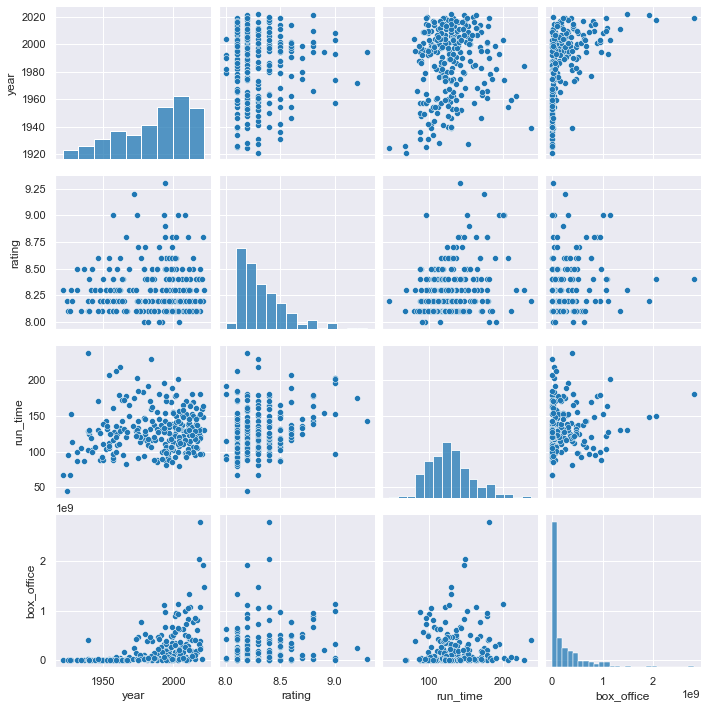

In [29]:
sns.pairplot(imdb);

### Joint Plot
The `jointplot()` function creates a figure that contains both a scatter plot and two histograms, one for each variable being plotted. This allows users to visualize the relationship between two variables and examine their individual distributions at the same time. Joint plot is particularly useful for exploring bivariate relationships between continuous variables, such as examining the relationship between height and weight, or between age and income. The following table shows the most important parameters of the `jointplot()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `kind` | The type of plot to use. | `scatter`, `reg`, `resid`, `kde`, `hex`. |
| `color` | The color of the plot. | A string representing a color. |
| `height` | The height of the plot. | A number. |
| `ratio` | The ratio of the joint axes height to the marginal axes height. | A number. |
| `space` | The space between the joint and marginal axes. | A number. |
| `dropna` | If `True`, missing values will be dropped. | `True` or `False`. |

</center>

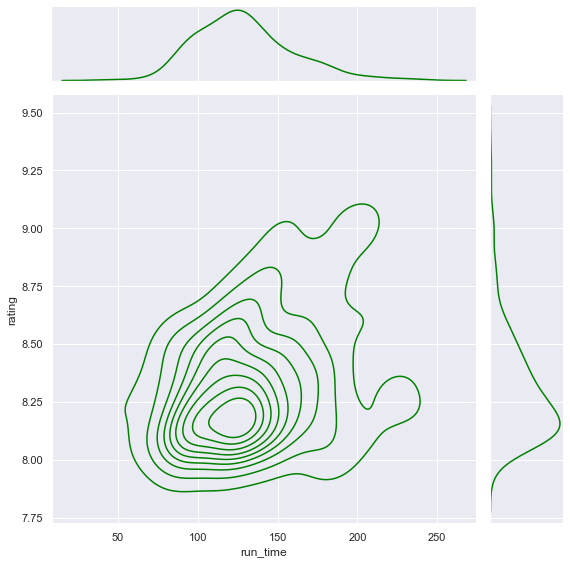

In [30]:
sns.jointplot(x='run_time', y='rating', data=imdb, kind='kde', color='green', height=8);

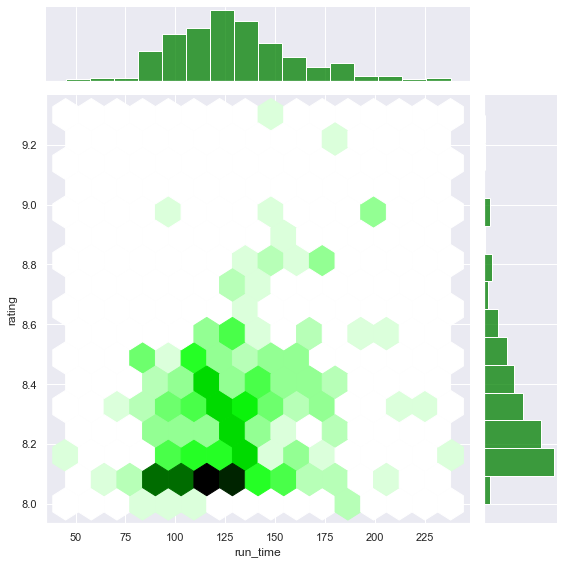

In [31]:
sns.jointplot(x='run_time', y='rating', data=imdb, kind='hex', color='green', height=8);

### Regression Plot
A **regression plot** is a plot that shows the relationship between two variables. It provides a flexible way to fit and visualize a linear regression model between two variables, along with a confidence interval around the regression line. The regression line shows the trend or the relationship between the two variables and can help to identify any outliers or patterns in the data. We can use the `regplot()` function to create a regression plot. The following table shows the most important parameters of the `regplot()` function:

<center>

| Parameter | Description | Possible values |
| --- | --- | --- |
| `ci` | The size of the confidence interval. | A number between 0 and 100. |
| `scatter` | If `True`, the data points will be plotted. | `True` or `False`. |
| `fit_reg` | If `True`, the regression line will be plotted. | `True` or `False`. |
| `order` | The order of the polynomial fit. | A number. |
| `line_kws` | The properties of the regression line. | A dictionary. |
| `scatter_kws` | The properties of the data points. | A dictionary. |

</center>

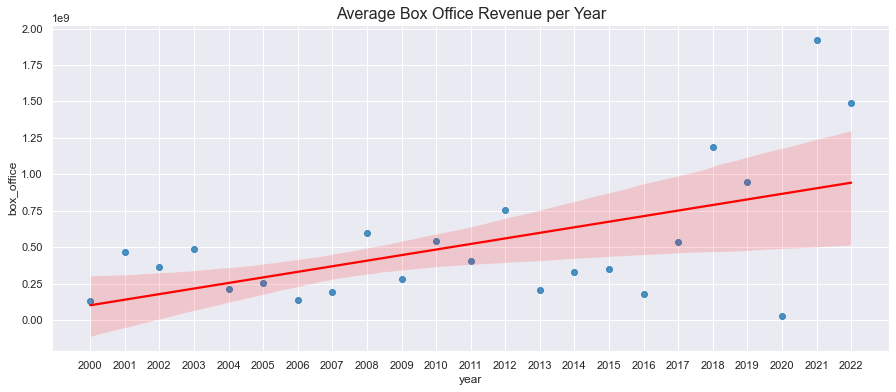

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
from_2000 = imdb[imdb['year'] >= 2000]
avg_by_year = from_2000.groupby('year').mean()
sns.regplot(x=avg_by_year.index, y='box_office', data=avg_by_year, ax=ax, line_kws={'color': 'red'}, ci=90)
ax.set_title('Average Box Office Revenue per Year', fontsize=16)
ax.set_xticks(range(2000, 2023, 1));

## Plotly

<center>
<img src="https://parsa-abbasi.github.io/talk/data-preparation-and-visualization-in-python/plotly.png" width="200" height="200" />
</center>

Plotly is a modern data visualization library that provides a high-level interface for creating interactive plots. The plots created with Plotly can be viewed in a web browser and can be easily shared with others.

There are two main ways to use Plotly in Python:
1. **Low-level interface:** This is the most flexible and customizable way to create plots in Plotly. It involves using the `plotly.graph_objs` module to define every aspect of the plot, including the data, layout, and style. This approach requires a good understanding of Plotly's object-oriented API, but allows for complete control over the final result.
2. **High-level interface:** This is the easiest way to create plots in Plotly. It involves using the `plotly.express` module to create plots with just a few lines of code. This approach is very convenient and requires no knowledge of Plotly's object-oriented API, but it is less flexible and customizable than the low-level interface.

In [33]:
import plotly.graph_objs as go
import plotly.express as px

### Low-Level Interface: Stacked Histogram
A **stacked histogram** is a histogram that shows the distribution of a variable for different categories.

In [34]:
# make a copy of the dataframe
df_copy = imdb.copy()
# extract the first genre of each movie
df_copy['first_genre'] = df_copy['genre'].apply(lambda x: x[0])

In [35]:
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text='Histogram of Movie Ratings by Genre')))
# plot a histogram for each genre
for genre in df_copy['first_genre'].unique():
    fig.add_trace(go.Histogram(x=df_copy[df_copy['first_genre'] == genre]['rating'], name=genre))
fig.update_layout(barmode='stack', xaxis_title='Rating', yaxis_title='Number of Movies')
fig.show()

### High-Level Interface: Bubble Chart
A **bubble chart** is a scatter plot in which the data points are replaced with bubbles, and an additional dimension of the data is represented in the size of the bubbles.

In [36]:
fig = px.scatter(df_copy, x='year', y='box_office', color='first_genre',
                size=df_copy['rating']-7.9, hover_name='name', log_y=True, height=600)
fig.update_layout(title='Bubble Chart of Box Office Revenue per Year',
                  xaxis_title='Year',
                  yaxis_title='Log of Box Office Revenue')
fig.show()

### 3D Scatter Plot
The `scatter3d()` function creates a 3D scatter plot. With this module, you can visualize data in a 3D space and explore relationships between different variables. The plot can be manipulated with various user interactions like zoom, pan, and rotation, giving a better understanding of the data distribution in a 3D space.   
Furthermore, we can also use `size` and `color` parameters to add other dimensions to the plot.

In [37]:
fig = px.scatter_3d(df_copy, x='year', y='rating', z='box_office', color='first_genre',
                    opacity=0.7, hover_name='name', hover_data=['directors'])
fig.update_layout(title='3D Scatter Plot of Movie Data',
                  width=1000, height=700)
fig.show()

## Save Figure
The following table shows the syntax for saving a figure in different libraries:

<center>

| Library |	Function Name | Syntax |
| --- | --- | --- |
| Matplotlib | `savefig()` | `plt.savefig('filename.png', dpi=300)` |
| Seaborn | `savefig()` | `sns.savefig('filename.png', dpi=300)` |
| Plotly | `write_image()` | `fig.write_image('filename.png', scale=3)` | 

</center>

## Comparison Table

<center>

| Plot Type | Description | Data Type | Use Cases | Pros |
| --- | --- | --- | --- | --- | 
| Histogram | Displays the distribution of a single continuous variable | Continuous | Analyzing frequency distribution of data | Shows data skewness and central tendency | 
| Bar Chart | 	Compares values of different categories using rectangular bars | Categorical or Continuous | Comparing data across different categories | Easy to read and interpret |
| Scatter Plot | 	Shows the relationship between two continuous variables | Continuous | Identifying patterns or trends in data | Can show the strength and direction of a relationship |
| Line Plot | Shows the trend of a continuous variable over time or another continuous variable | Continuous | Analyzing trends over time or across another continuous variable | Easy to read and interpret | 
| Pie Chart | Shows the proportion of different categories in a data set | Categorical | Comparing the proportion of different categories | Easy to read and interpret | 
| Heatmap | Displays data values as colors in a grid format | Categorical or Continuous | Analyzing patterns or trends in data | Can highlight data clusters or outliers |
| Box Plot | Shows the distribution of a continuous variable using quartiles and outliers | Continuous | Analyzing the distribution of data | Can show outliers and quartiles |
| Pair Plot | Shows the relationship between multiple variables in a data set | Continuous | Analyzing the relationship between multiple variables | Can show correlations and patterns | 
| Joint Plot | Shows the relationship between two variables using multiple plots | Continuous | Analyzing the relationship between two variables | Can show correlations and patterns | 
| Regression Plot | Shows the relationship between two variables and fits a regression line to the data	 | Continuous | Analyzing the relationship between two variables and predicting values | Can show the strength and direction of a relationship | 

</center>